In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [201]:
label = 'aggregated-ns'
clabel = 'avg.'

label = 'aggregated'
clabel = 'avg.'

#label = 'single'
#clabel = ''

In [202]:
results = []

In [203]:
data = pd.read_csv(f'processed-{label}.csv')

In [204]:
data.columns

Index(['Unnamed: 0', 'dataset', 'k', 'acc', 'sens', 'spec', 'auc', 'best_acc',
       'best_sens', 'best_spec', 'threshold', 'best_threshold',
       'best_acc_orig', 'p', 'n', 'auc_min', 'auc_min_best', 'auc_rmin',
       'auc_rmin_best', 'auc_amin', 'auc_amin_best', 'auc_armin',
       'auc_armin_best', 'auc_max', 'auc_max_best', 'auc_amax',
       'auc_amax_best', 'auc_maxa', 'auc_maxa_best', 'acc_min', 'acc_rmin',
       'acc_max', 'acc_rmax', 'max_acc_min', 'max_acc_max', 'max_acc_rmax'],
      dtype='object')

In [205]:
def convert(x):
    try:
        return float(x)
    except:
        return None

In [206]:
data['auc_min_max'] = (data['auc_min'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_max'] = (data['auc_rmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_maxa'] = (data['auc_rmin'].apply(convert) + data['auc_maxa'].apply(convert)) / 2.0

data['auc_min_max_best'] = (data['auc_min_best'].apply(convert) + data['auc_max_best'].apply(convert)) / 2.0
data['auc_rmin_max_best'] = (data['auc_rmin_best'].apply(convert) + data['auc_max_best'].apply(convert)) / 2.0

data['auc_min_maxa_best'] = (data['auc_min_best'].apply(convert) + data['auc_maxa_best'].apply(convert)) / 2.0
data['auc_rmin_maxa_best'] = (data['auc_rmin_best'].apply(convert) + data['auc_maxa_best'].apply(convert)) / 2.0

data['max_acc_min_max'] = (data['max_acc_min'].apply(convert) + data['max_acc_max'].apply(convert)) / 2.0
data['max_acc_min_rmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_rmax'].apply(convert)) / 2.0

In [207]:
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

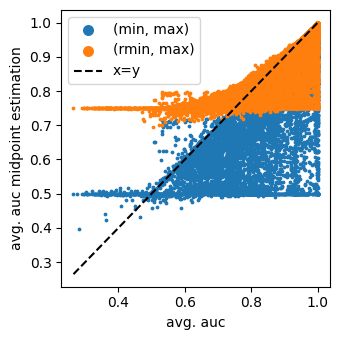

In [208]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), min(data['auc_min_max']), min(data['auc_rmin_max']))
plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=3)
plt.scatter(data['auc'], data['auc_rmin_max'], label='(rmin, max)', s=3)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()

In [209]:
tmp = data[['auc', 'auc_rmin_max']].dropna()
(r2_score(data['auc'], data['auc_min_max']),
r2_score(tmp['auc'], tmp['auc_rmin_max']))

(0.02947892311270217, 0.5659217890325335)

In [210]:
(mean_absolute_percentage_error(data['auc'], data['auc_min_max']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max']))

(np.float64(0.1221295216488347), np.float64(0.08932129080421265))

In [211]:
data

,Unnamed: 0,dataset,k,acc,sens,spec,auc,best_acc,best_sens,best_spec,...,max_acc_rmax,auc_min_max,auc_rmin_max,auc_rmin_maxa,auc_min_max_best,auc_rmin_max_best,auc_min_maxa_best,auc_rmin_maxa_best,max_acc_min_max,max_acc_min_rmax
0,0,bupa,8,0.652175,0.620962,0.675000,0.666053,0.695638,0.566525,0.790000,...,0.822017,0.647881,0.771928,0.676929,0.678163,0.781813,0.583163,0.686814,0.728406,0.709290
1,1,SPECTF,2,0.767900,0.400150,0.863200,0.631670,0.794000,0.000000,1.000000,...,0.899773,0.631622,0.753729,0.702557,0.500000,0.750000,0.435193,0.685193,NaN,NaN
2,2,vowel0,4,0.899800,0.932800,0.896400,0.989213,0.985850,0.910075,0.993300,...,0.999038,0.914500,0.921976,0.921380,0.951588,0.954112,0.950991,0.953516,0.978295,0.978289
3,3,australian,6,0.608700,0.566983,0.642217,0.604595,0.608700,0.566983,0.642217,...,0.758673,0.604500,0.760962,0.606039,0.604500,0.760962,0.449577,0.606039,0.691356,0.658347
4,4,saheart,4,0.647025,0.481250,0.734725,0.615969,0.655650,0.475000,0.751225,...,0.820538,0.607901,0.761117,0.630811,0.613012,0.762817,0.482141,0.631945,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,glass0,9,0.733700,0.902778,0.652778,0.814050,0.766711,0.859122,0.722222,...,0.932396,0.777678,0.827216,0.765393,0.790572,0.834548,0.728749,0.772725,0.828697,0.823177
9996,9996,vehicle0,10,0.834500,0.297370,1.000000,0.979652,0.935000,0.919210,0.939790,...,0.995210,0.648585,0.772122,0.766268,0.929400,0.934556,0.923546,0.928702,0.954825,0.954720
9997,9997,haberman,2,0.735300,0.000000,1.000000,0.651903,0.745100,0.186600,0.946750,...,0.881255,0.500000,0.750000,0.666605,0.566648,0.737807,0.499906,0.671064,NaN,NaN
9998,9998,haberman,3,0.735300,0.000000,1.000000,0.603457,0.735300,0.012333,0.995567,...,0.855761,0.500000,0.750000,0.660072,0.503948,0.747931,0.416105,0.660088,NaN,NaN


In [212]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_max']))

WilcoxonResult(statistic=np.float64(2359454.0), pvalue=np.float64(0.0))

In [184]:
results.append({'target': ['auc', 'auc'],
                'source': ['arb.', 'arb.'],
                'estimation': ['(min, max)', '(rmin, max)'],
                'r2': [r2_score(data['auc'], data['auc_min_max']),
                       r2_score(tmp['auc'], tmp['auc_rmin_max'])],
                'mape': [mean_absolute_percentage_error(data['auc'], data['auc_min_max']),
                         mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max'])]})

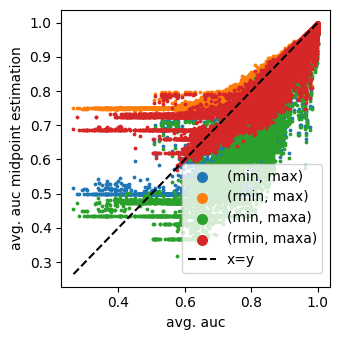

In [185]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), 
              min(data['auc_min_max_best']),
              min(data['auc_rmin_max_best']),
              min(data['auc_min_maxa_best']),
              min(data['auc_rmin_maxa_best']),
              )
plt.scatter(data['auc'], data['auc_min_max_best'], label='(min, max)', s=3)
plt.scatter(data['auc'], data['auc_rmin_max_best'], label='(rmin, max)', s=3)
plt.scatter(data['auc'], data['auc_min_maxa_best'], label='(min, maxa)', s=3)
plt.scatter(data['auc'], data['auc_rmin_maxa_best'], label='(rmin, maxa)', s=3)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4, loc=(0.45, 0.05))
plt.tight_layout()

In [186]:
tmp0 = data[['auc', 'auc_rmin_max_best']].dropna()
tmp1 = data[['auc', 'auc_min_maxa_best']].dropna()
tmp2 = data[['auc', 'auc_rmin_maxa_best']].dropna()
(r2_score(data['auc'], data['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp1['auc'], tmp1['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best']))

(0.6288993495860266,
 0.6869941823807318,
 0.3004038509107084,
 0.7515673538688481)

In [187]:
(mean_absolute_percentage_error(data['auc'], data['auc_min_max_best']),
mean_absolute_percentage_error(tmp0['auc'], tmp0['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp1['auc'], tmp1['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_rmin_maxa_best']))

(np.float64(0.08254031204010405),
 np.float64(0.07959541815053835),
 np.float64(0.12262862664096826),
 np.float64(0.07035033211725435))

In [188]:
results.append({'target': ['auc', 'auc', 'auc', 'auc'],
                'source': ['max', 'max', 'max', 'max'],
                'estimation': ['(min, max)', '(rmin, max)', '(min, maxa)', '(rmin, maxa)'],
                'r2': (r2_score(data['auc'], data['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp1['auc'], tmp1['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best'])),
                'mape': (mean_absolute_percentage_error(data['auc'], data['auc_min_max_best']),
mean_absolute_percentage_error(tmp0['auc'], tmp0['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp1['auc'], tmp1['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_rmin_maxa_best']))})

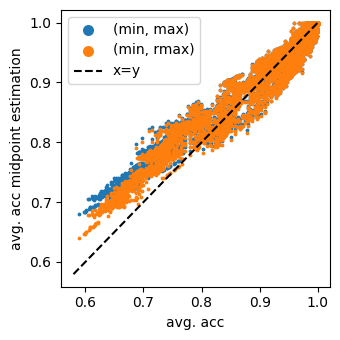

In [189]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['best_acc']), 
              min(data['max_acc_min_max']),
              min(data['max_acc_min_rmax']))
plt.scatter(data['best_acc'], data['max_acc_min_max'], label='(min, max)', s=3)
plt.scatter(data['best_acc'], data['max_acc_min_rmax'], label='(min, rmax)', s=3)
plt.xlabel(f'{clabel} acc')
plt.ylabel(f'{clabel} acc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()

In [190]:
tmp0 = data[['best_acc', 'max_acc_min_max']].dropna()
tmp1 = data[['best_acc', 'max_acc_min_rmax']].dropna()
(r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(0.9013205512486454, 0.9235611037446019)

In [191]:
(mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(np.float64(0.030477499870526854), np.float64(0.02707786137826665))

In [192]:
results.append({'target': ['acc', 'acc'],
                'source': ['auc', 'auc'],
                'estimation': ['(min, max)', '(min, rmax)'],
                'r2': (r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax'])),
                'mape': (mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))})

In [193]:
results = pd.concat([pd.DataFrame(results[0]), pd.DataFrame(results[1]), pd.DataFrame(results[2])])

In [194]:
results

,target,source,estimation,r2,mape
0,auc,arb.,"(min, max)",0.029479,0.122130
1,auc,arb.,"(rmin, max)",0.565922,0.089321
0,auc,max,"(min, max)",0.628899,0.082540
1,auc,max,"(rmin, max)",0.686994,0.079595
2,auc,max,"(min, maxa)",0.300404,0.122629
3,auc,max,"(rmin, maxa)",0.751567,0.070350
0,acc,auc,"(min, max)",0.901321,0.030477
1,acc,auc,"(min, rmax)",0.923561,0.027078
